# Impact of using I-type blocks in P-type frames

In [47]:
sequence = "crowd_run_1080"

In [49]:
!../sequences/$sequence/runme.sh

crowd_run_1080p50.y4m exists.
ffmpeg version n4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid --enabl

## Without I-type blocks

In [50]:
!sed -z -i 's/\n#import image_IPP as codec\n/\nimport image_IPP as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as codec\n/\n#import image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as codec\n/\n#import MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py

!sed -z -i 's!\ntransform = "DWT"\n!\n#transform = "DWT"\n!g' config.py
!sed -z -i 's!\ntransform = "LT"\n!\n#transform = "LT"\n!g' config.py
!sed -z -i 's!\n#transform = None\n!\ntransform = None\n!g' config.py

In [51]:
!cat -n RD_curve.py | grep "import"
!cat -n config.py | grep "transform"

     5	import config
     6	import distortion
     7	import frame
    10	#import image_interpolated_IPP as codec
    11	import image_IPP as codec
    12	#import image_IPP_adaptive as codec
    13	#import MP4 as codec
    14	#import IPP_compressor as codec
     3	#transform = "DWT"
     4	#transform = "LP"
     5	transform = None


In [52]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

     1	Q_step: 21 BPP: 0.4403315757887517 KBPS: 82176.44 Average AMSE: 63.50420437349964
     2	Q_step: 24 BPP: 0.28111213991769546 KBPS: 52462.272 Average AMSE: 90.52940218835734
     3	Q_step: 27 BPP: 0.18366722393689985 KBPS: 34276.712 Average AMSE: 131.53927339999143
     4	Q_step: 30 BPP: 0.11915663580246913 KBPS: 22237.488 Average AMSE: 192.1461410215192
     5	Q_step: 33 BPP: 0.07687465706447189 KBPS: 14346.656 Average AMSE: 276.08748328189296
     6	Q_step: 36 BPP: 0.04998221021947874 KBPS: 9327.88 Average AMSE: 372.7145802951389
     7	Q_step: 39 BPP: 0.03501697530864197 KBPS: 6535.008 Average AMSE: 465.0679086076818


In [53]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/no_I-blocks.txt

In [54]:
!cat /tmp/no_I-blocks.txt

0.4403315757887517	63.50420437349964
0.28111213991769546	90.52940218835734
0.18366722393689985	131.53927339999143
0.11915663580246913	192.1461410215192
0.07687465706447189	276.08748328189296
0.04998221021947874	372.7145802951389
0.03501697530864197	465.0679086076818


In [55]:
RD_no_Iblocks = []
with open("/tmp/no_I-blocks.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_no_Iblocks.append((float(rate), float(_distortion)))

## With I-type blocks

In [56]:
!sed -z -i 's/\nimport image_IPP as codec/\n#import image_IPP as codec/g' RD_curve.py
!sed -z -i 's/\n#import image_IPP_adaptive as codec\n/\nimport image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as codec\n/\n#import MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py

!sed -z -i 's!\ntransform = "DWT"\n!\n#transform = "DWT"\n!g' config.py
!sed -z -i 's!\ntransform = "LT"\n!\n#transform = "LT"\n!g' config.py
!sed -z -i 's!\n#transform = None\n!\ntransform = None\n!g' config.py

In [57]:
!cat -n RD_curve.py | grep "import"
!cat -n config.py | grep "transform"

     5	import config
     6	import distortion
     7	import frame
    10	#import image_interpolated_IPP as codec
    11	#import image_IPP as codec
    12	import image_IPP_adaptive as codec
    13	#import MP4 as codec
    14	#import IPP_compressor as codec
     3	#transform = "DWT"
     4	#transform = "LP"
     5	transform = None


In [58]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

     1	Q_step: 21 BPP: 0.2301560356652949 KBPS: 42952.64 Average AMSE: 94.79426312264226
     2	Q_step: 24 BPP: 0.14849241255144033 KBPS: 27712.248 Average AMSE: 137.40300533693414
     3	Q_step: 27 BPP: 0.09565286351165982 KBPS: 17851.12 Average AMSE: 194.56174213927474
     4	Q_step: 30 BPP: 0.06215102023319616 KBPS: 11598.872 Average AMSE: 265.6965782482424
     5	Q_step: 33 BPP: 0.041803283607681756 KBPS: 7801.495999999999 Average AMSE: 348.3712924061214
     6	Q_step: 36 BPP: 0.029392361111111112 KBPS: 5485.320000000001 Average AMSE: 452.74375258273307
     7	Q_step: 39 BPP: 0.022114754801097394 KBPS: 4127.144 Average AMSE: 578.6248134591478


In [59]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/with_I-blocks.txt

In [60]:
!cat /tmp/with_I-blocks.txt

0.2301560356652949	94.79426312264226
0.14849241255144033	137.40300533693414
0.09565286351165982	194.56174213927474
0.06215102023319616	265.6965782482424
0.041803283607681756	348.3712924061214
0.029392361111111112	452.74375258273307
0.022114754801097394	578.6248134591478


In [61]:
RD_with_Iblocks = []
with open("/tmp/with_I-blocks.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_with_Iblocks.append((float(rate), float(_distortion)))

## MP4

In [62]:
!sed -z -i 's!\nimport image_IPP as codec!\n#import image_IPP as codec!g' RD_curve.py
!sed -z -i 's!\nimport image_IPP_adaptive as codec\n!\n#import image_IPP_adaptive as codec\n!g' RD_curve.py
!sed -z -i 's!\nimport IPP_compressor as codec\n!\n#import IPP_compressor as codec\n!g' RD_curve.py
!sed -z -i 's!\n#import MP4 as codec\n!\nimport MP4 as codec\n!g' RD_curve.py

!sed -z -i 's!\ntransform = "DWT"\n!\n#transform = "DWT"\n!g' config.py
!sed -z -i 's!\ntransform = "LT"\n!\n#transform = "LT"\n!g' config.py
!sed -z -i 's!\n#transform = None\n!\ntransform = None\n!g' config.py

In [63]:
!cat -n RD_curve.py | grep "import"
!cat -n config.py | grep "transform"

     5	import config
     6	import distortion
     7	import frame
    10	#import image_interpolated_IPP as codec
    11	#import image_IPP as codec
    12	#import image_IPP_adaptive as codec
    13	import MP4 as codec
    14	#import IPP_compressor as codec
     3	#transform = "DWT"
     4	#transform = "LP"
     5	transform = None


In [64]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

ffmpeg version n4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid --enable-libzimg --enable-nvdec --ena

[libx264 @ 0x555a07a68080] using SAR=1/1
[libx264 @ 0x555a07a68080] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX FMA3 BMI2 AVX2
[libx264 @ 0x555a07a68080] profile High 4:4:4 Predictive, level 4.0, 4:4:4, 8-bit
[libx264 @ 0x555a07a68080] 264 - core 161 r3039 544c61f - H.264/MPEG-4 AVC codec - Copyleft 2003-2021 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=4 threads=6 lookahead_threads=1 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bframes=0 weightp=2 keyint=30 keyint_min=3 scenecut=40 intra_refresh=0 rc_lookahead=30 rc=crf mbtree=1 crf=24.0 qcomp=0.60 qpmin=0 qpmax=69 qpstep=4 ip_ratio=1.40 aq=1:1.00
Output #0, mp4, to '/tmp/output.mp4':
  Metadata:
    encoder         : Lavf58.45.100
    Stream #0:0: Video: h264 (libx264) (avc1 / 0x31637661), yuv444p,

ffmpeg version n4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid --enable-libzimg --enable-nvdec --ena

Output #0, image2, to '/tmp/original_reconstructed_%03d.png':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf58.45.100
    Stream #0:0(und): Video: png, rgb24, 1920x1080 [SAR 1:1 DAR 16:9], q=2-31, 200 kb/s, 25 fps, 25 tbn, 25 tbc (default)
    Metadata:
      handler_name    : VideoHandler
      encoder         : Lavc58.91.100 png
frame=   30 fps=8.3 q=-0.0 Lsize=N/A time=00:00:01.20 bitrate=N/A speed=0.331x    
video:128156kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version n4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enabl

Input #0, image2, from '/tmp/original_%03d.png':
  Duration: 00:00:20.00, start: 0.000000, bitrate: N/A
    Stream #0:0: Video: png, rgb24(pc), 1920x1080 [SAR 1:1 DAR 16:9], 25 tbr, 25 tbn, 25 tbc
Stream mapping:
  Stream #0:0 -> #0:0 (png (native) -> h264 (libx264))
Press [q] to stop, [?] for help
[libx264 @ 0x55b3028da080] using SAR=1/1
[libx264 @ 0x55b3028da080] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX FMA3 BMI2 AVX2
[libx264 @ 0x55b3028da080] profile High 4:4:4 Predictive, level 4.0, 4:4:4, 8-bit
[libx264 @ 0x55b3028da080] 264 - core 161 r3039 544c61f - H.264/MPEG-4 AVC codec - Copyleft 2003-2021 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=4 threads=6 lookahead_threads=1 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bframes=0 weightp=2 keyint=

frame=   30 fps= 11 q=-1.0 Lsize=     360kB time=00:00:01.16 bitrate=2543.7kbits/s speed=0.43x    
video:359kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.261482%
[libx264 @ 0x55be26965080] frame I:1     Avg QP:43.64  size: 51812
[libx264 @ 0x55be26965080] frame P:29    Avg QP:45.09  size: 10878
[libx264 @ 0x55be26965080] mb I  I16..4: 24.9% 64.1% 11.0%
[libx264 @ 0x55be26965080] mb P  I16..4:  0.3%  0.8%  0.0%  P16..4: 27.0%  4.4%  4.2%  0.0%  0.0%    skip:63.3%
[libx264 @ 0x55be26965080] 8x8 transform intra:66.5% inter:84.0%
[libx264 @ 0x55be26965080] coded y,u,v intra: 36.6% 25.5% 24.6% inter: 6.5% 4.2% 4.1%
[libx264 @ 0x55be26965080] i16 v,h,dc,p: 39% 34% 15% 12%
[libx264 @ 0x55be26965080] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 19% 12% 31%  6%  6%  7%  6%  6%  6%
[libx264 @ 0x55be26965080] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 29% 16% 20%  8%  6%  6%  6%  5%  4%
[libx264 @ 0x55be26965080] Weighted P-Frames: Y:0.0% UV:0.0%
[libx264 @ 0x55be26965080] ref P L0: 83.

In [65]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/MP4.txt

In [66]:
!cat /tmp/MP4.txt

0.20031893004115225	46.581436798053836
0.11955829903978052	64.86043479938272
0.0762258230452675	90.11534643990053
0.05028232167352538	125.18513549168382
0.03368064128943758	175.0363375664438
0.022720207475994514	243.97937630744173
0.015812114197530865	334.5504627593449


In [67]:
RD_MP4 = []
with open("/tmp/MP4.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_MP4.append((float(rate), float(_distortion)))

## Comparison

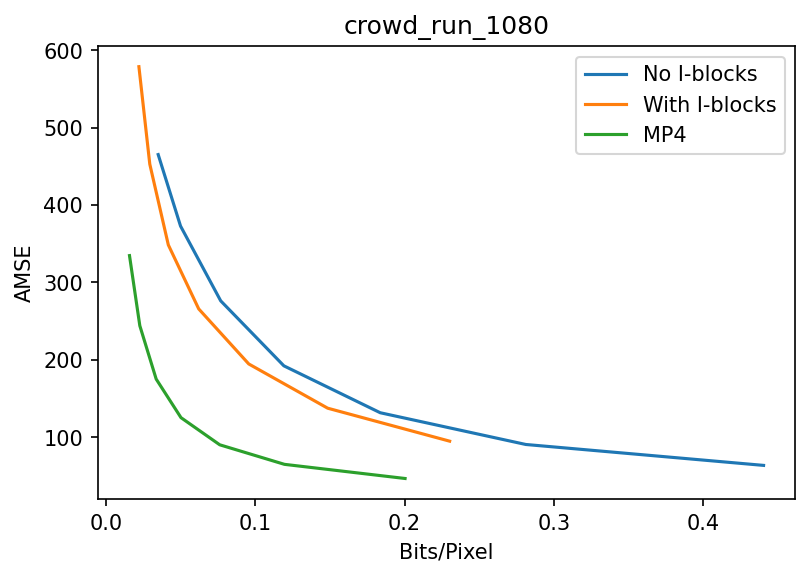

In [68]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_no_Iblocks), label="No I-blocks")
pylab.plot(*zip(*RD_with_Iblocks), label="With I-blocks")
pylab.plot(*zip(*RD_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()

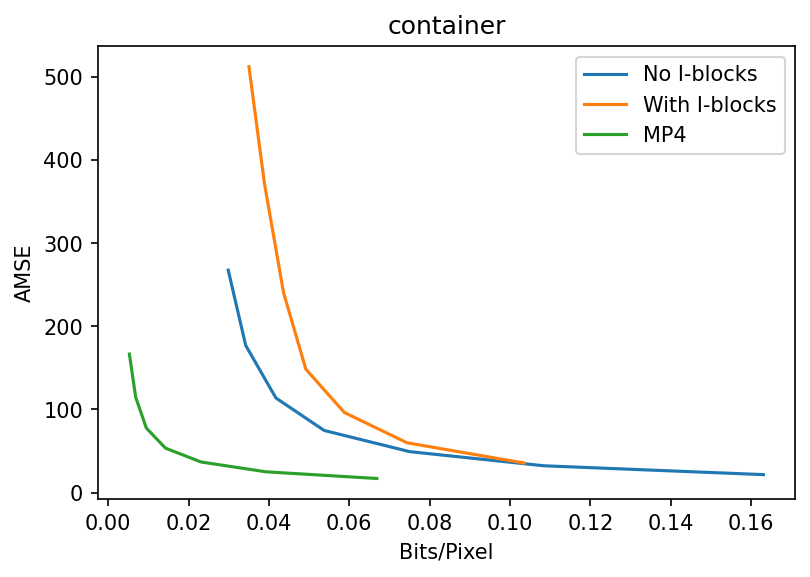

In [44]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_no_Iblocks), label="No I-blocks")
pylab.plot(*zip(*RD_with_Iblocks), label="With I-blocks")
pylab.plot(*zip(*RD_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()

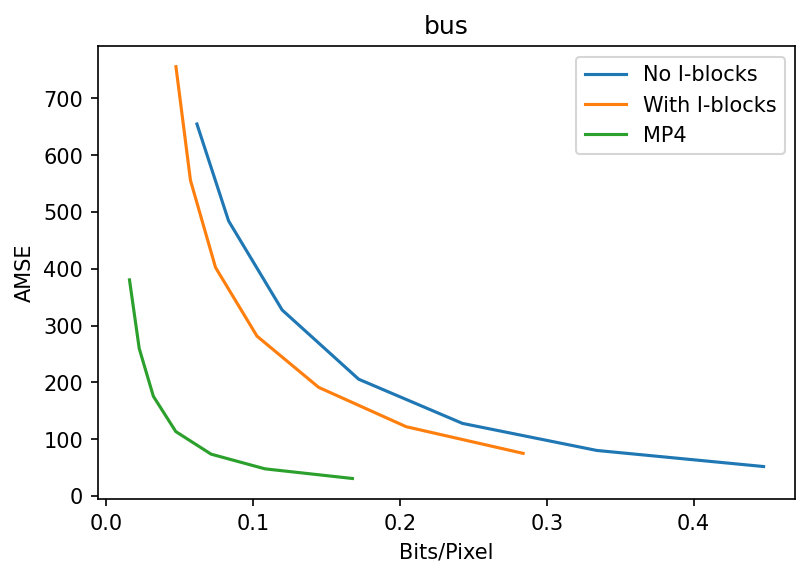

In [22]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_no_Iblocks), label="No I-blocks")
pylab.plot(*zip(*RD_with_Iblocks), label="With I-blocks")
pylab.plot(*zip(*RD_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()

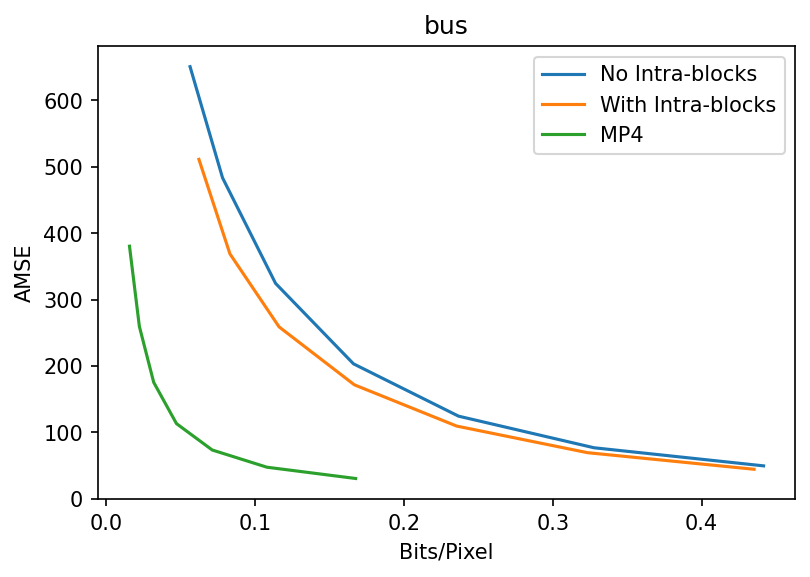

In [23]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_points_no_intrablocks), label="No Intra-blocks")
pylab.plot(*zip(*RD_points_with_intrablocks), label="With Intra-blocks")
pylab.plot(*zip(*RD_points_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()